In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/Users/anish/Documents/DSP Datasets/Games_Dataset_Model.csv')
df

,Unnamed: 0,Name,Platform,Summary,Global_Sales
0,0,Wii Sports,Wii,Tennis (1-4 players): Players grab the control...,82.74
1,1,Mario Kart Wii,Wii,Mario Kart Wii comes with the intuitive Wii Wh...,35.82
2,2,Wii Sports Resort,Wii,Wii Sports Resort is a collection of fun sport...,33.00
3,3,New Super Mario Bros.,DS,The first new 2D Mario platformer since Super ...,30.01
4,4,Wii Play,Wii,"In Wii Play, the star of the game is you. Crea...",29.02
...,...,...,...,...,...
6066,6113,Battle Fantasia,PS3,Apart from the fast paced combat and responsiv...,0.01
6067,6114,Super Robot Taisen: Original Generation,GBA,Super Robot Taisen: Original Generation is a s...,0.01
6068,6115,Mortal Kombat: Deadly Alliance,GBA,A controversial franchise marks its return in ...,0.01
6069,6116,PGA European Tour,N64,"Realism, Authenticity, Sophistication and a Eu...",0.01


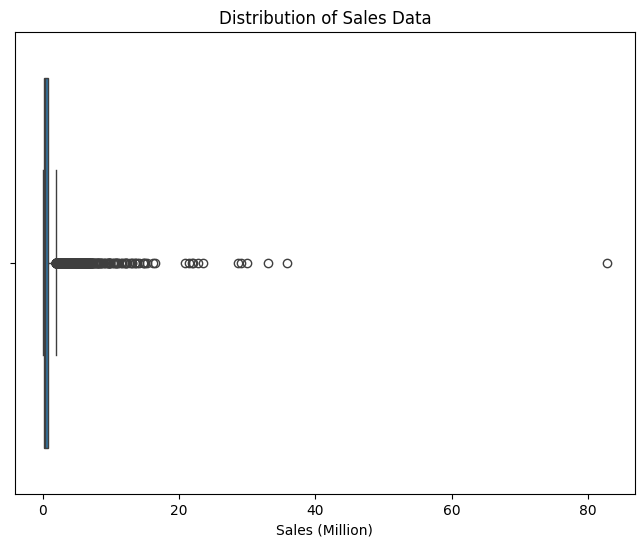

In [7]:
# Plot a box plot of the sales data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Global_Sales'])
plt.title('Distribution of Sales Data')
plt.xlabel('Sales (Million)')
plt.show()

In [29]:
threshold_amount = 2
sales_threshold = df[df['Global_Sales'] > threshold_amount]

# Get the number of sales above the threshold
num_sales_above_threshold = sales_threshold.shape[0]

print(f'Number of sales above {threshold_amount}: {num_sales_above_threshold}')

Number of sales above 2: 555


In [30]:
sales_under_threshold = df[df['Global_Sales'] <= threshold_amount].copy()

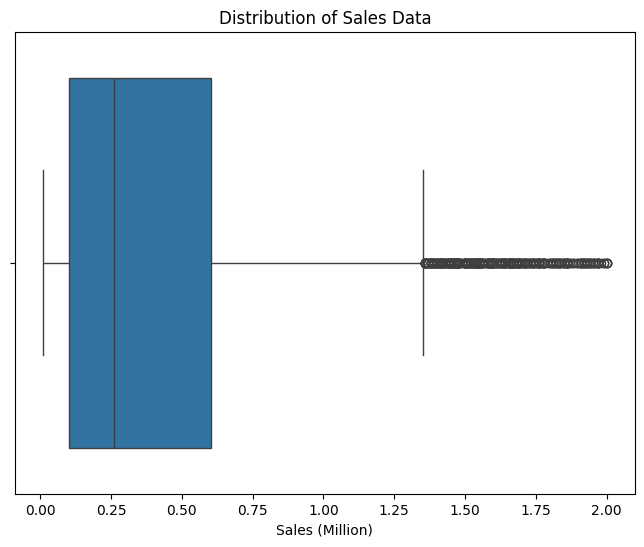

In [31]:
# Plot a box plot of the sales data with updated threshold
plt.figure(figsize=(8, 6))
sns.boxplot(x=sales_under_threshold['Global_Sales'])
plt.title('Distribution of Sales Data')
plt.xlabel('Sales (Million)')
plt.show()

In [32]:
sales_under_threshold

,Unnamed: 0,Name,Platform,Summary,Global_Sales
555,555,LEGO Marvel Super Heroes,PS3,LEGO Marvel Super Heroes features an original ...,2.00
556,556,Fire Emblem: Awakening,3DS,Lead an army of soldiers in a series of scaled...,2.00
557,557,Mortal Kombat vs. DC Universe,PS3,"For the first time ever Scorpion, Sub-Zero and...",2.00
558,558,Tenchu: Stealth Assassins,PS,Prowl and strike with lethal precision as ninj...,1.99
559,559,Harry Potter and the Chamber of Secrets,GBA,Be Harry Potter in a new adventure with more m...,1.99
...,...,...,...,...,...
6066,6113,Battle Fantasia,PS3,Apart from the fast paced combat and responsiv...,0.01
6067,6114,Super Robot Taisen: Original Generation,GBA,Super Robot Taisen: Original Generation is a s...,0.01
6068,6115,Mortal Kombat: Deadly Alliance,GBA,A controversial franchise marks its return in ...,0.01
6069,6116,PGA European Tour,N64,"Realism, Authenticity, Sophistication and a Eu...",0.01


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [47]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


[nltk_data] Downloading package punkt to /Users/anish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
sales_under_threshold['Preprocessed_Summary'] = sales_under_threshold['Summary'].apply(preprocess_text)
sales_under_threshold

,Unnamed: 0,Name,Platform,Summary,Global_Sales,Preprocessed_Summary
555,555,LEGO Marvel Super Heroes,PS3,LEGO Marvel Super Heroes features an original ...,2.00,lego marvel super hero feature original story ...
556,556,Fire Emblem: Awakening,3DS,Lead an army of soldiers in a series of scaled...,2.00,lead army soldier series scaled turn-based str...
557,557,Mortal Kombat vs. DC Universe,PS3,"For the first time ever Scorpion, Sub-Zero and...",2.00,first time ever scorpion sub-zero mortal komba...
558,558,Tenchu: Stealth Assassins,PS,Prowl and strike with lethal precision as ninj...,1.99,prowl strike lethal precision ninja assassin r...
559,559,Harry Potter and the Chamber of Secrets,GBA,Be Harry Potter in a new adventure with more m...,1.99,harry potter new adventure magic friend danger...
...,...,...,...,...,...,...
6066,6113,Battle Fantasia,PS3,Apart from the fast paced combat and responsiv...,0.01,apart fast paced combat responsive control 's ...
6067,6114,Super Robot Taisen: Original Generation,GBA,Super Robot Taisen: Original Generation is a s...,0.01,super robot taisen original generation strateg...
6068,6115,Mortal Kombat: Deadly Alliance,GBA,A controversial franchise marks its return in ...,0.01,controversial franchise mark return mortal kom...
6069,6116,PGA European Tour,N64,"Realism, Authenticity, Sophistication and a Eu...",0.01,realism authenticity sophistication european t...


In [52]:
from collections import Counter
# Tokenize the preprocessed descriptions
preprocessed_tokens = [desc.split() for desc in sales_under_threshold['Preprocessed_Summary']]

# Flatten the list of tokens
all_tokens = [token for desc_tokens in preprocessed_tokens for token in desc_tokens]

# Count the occurrences of each word
word_counts = Counter(all_tokens)

# Filter out words that appeared at least 100 times
words_at_least_100_times = {word: count for word, count in word_counts.items() if count >= 100}

# Print the words that appeared at least 100 times
count = 0
print("Words that appeared at least 100 times:")
for word, count in words_at_least_100_times.items():
    print(f"{word}: {count}")
    count = count + 1

print(count)

Words that appeared at least 100 times:
lego: 131
marvel: 105
super: 272
hero: 725
feature: 1604
original: 556
story: 843
player: 5061
take: 1784
control: 1264
man: 326
spider-man: 114
america: 149
many: 282
character: 1762
stop: 218
host: 118
villain: 136
world: 2751
lead: 261
army: 358
soldier: 184
series: 950
strategy: 332
battle: 1848
develop: 106
team: 1113
special: 437
ability: 737
battlefield: 177
gain: 168
victory: 147
advance: 155
wide: 133
array: 165
variety: 547
nation: 126
making: 165
unique: 884
see: 240
first: 797
time: 1213
ever: 526
warrior: 314
popular: 226
universe: 352
choose: 476
side: 187
challenge: 896
opponent: 373
new: 4114
fighting: 517
system: 1085
including: 1246
along: 278
dynamic: 217
environment: 703
plus: 184
pick: 130
favorite: 350
adventure: 845
single: 277
mode: 2190
storyline: 270
two: 543
strike: 114
ninja: 260
japan: 121
weapon: 895
must: 806
move: 702
survive: 137
master: 388
wild: 141
evil: 640
demon: 155
20: 189
stunning: 122
star: 469
town: 179


In [65]:
# Remove words found at least 100 times from preprocessed descriptions
preprocessed_descriptions_without_common_words = [' '.join([word for word in desc.split() if word not in words_at_least_100_times]) for desc in sales_under_threshold['Preprocessed_Summary']]

# Update the DataFrame with preprocessed descriptions without common words
sales_under_threshold['Preprocessed_Summary_More'] = preprocessed_descriptions_without_common_words
sales_under_threshold

,Name,Platform,Summary,Global_Sales,Preprocessed_Summary,Preprocessed_Summary_More
555,LEGO Marvel Super Heroes,PS3,LEGO Marvel Super Heroes features an original ...,2.00,lego marvel super hero feature original story ...,iron hulk captain wolverine unite loki assembl...
556,Fire Emblem: Awakening,3DS,Lead an army of soldiers in a series of scaled...,2.00,lead army soldier series scaled turn-based str...,scaled turn-based process relationship utilizi...
557,Mortal Kombat vs. DC Universe,PS3,"For the first time ever Scorpion, Sub-Zero and...",2.00,first time ever scorpion sub-zero mortal komba...,scorpion sub-zero mortal kombat batman superma...
558,Tenchu: Stealth Assassins,PS,Prowl and strike with lethal precision as ninj...,1.99,prowl strike lethal precision ninja assassin r...,prowl lethal precision assassin rikimaru ayame...
559,Harry Potter and the Chamber of Secrets,GBA,Be Harry Potter in a new adventure with more m...,1.99,harry potter new adventure magic friend danger...,potter danger sophomore hogwarts witchcraft wi...
...,...,...,...,...,...,...
6066,Battle Fantasia,PS3,Apart from the fast paced combat and responsiv...,0.01,apart fast paced combat responsive control 's ...,apart paced responsive apart rest fantasia pla...
6067,Super Robot Taisen: Original Generation,GBA,Super Robot Taisen: Original Generation is a s...,0.01,super robot taisen original generation strateg...,robot taisen dozen mecha 40+
6068,Mortal Kombat: Deadly Alliance,GBA,A controversial franchise marks its return in ...,0.01,controversial franchise mark return mortal kom...,controversial mark mortal kombat alliance in-d...
6069,PGA European Tour,N64,"Realism, Authenticity, Sophistication and a Eu...",0.01,realism authenticity sophistication european t...,realism authenticity sophistication european e...


In [58]:
from nltk import ngrams
from collections import Counter

# Tokenize the preprocessed descriptions
preprocessed_tokens = [desc.split() for desc in sales_under_threshold['Preprocessed_Summary']]

# Remove words found in words_at_least_100_times from tokens
preprocessed_tokens = [[token for token in tokens if token not in words_at_least_100_times] for tokens in preprocessed_tokens]

# Find bigrams and trigrams
bigrams = [gram for desc_tokens in preprocessed_tokens for gram in ngrams(desc_tokens, 2)]
trigrams = [gram for desc_tokens in preprocessed_tokens for gram in ngrams(desc_tokens, 3)]

# Count the occurrences of each bigram and trigram
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Filter out bigrams and trigrams that appeared at least 50 times
frequent_bigrams = {gram: count for gram, count in bigram_counts.items() if count >= 50}
frequent_trigrams = {gram: count for gram, count in trigram_counts.items() if count >= 50}

# Print frequent bigrams and trigrams
print("Frequent Bigrams:")
for gram, count in frequent_bigrams.items():
    print(f"{gram}: {count}")

print("\nFrequent Trigrams:")
for gram, count in frequent_trigrams.items():
    print(f"{gram}: {count}")

Frequent Bigrams:
('mortal', 'kombat'): 53
('square', 'enix'): 52
('tony', 'hawk'): 60
('silent', 'hill'): 53

Frequent Trigrams:


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Vectorize the preprocessed descriptions using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(sales_under_threshold['Preprocessed_Summary'])
y = sales_under_threshold['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.192573892155454


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Vectorize the preprocessed descriptions using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(sales_under_threshold['Preprocessed_Summary_More'])
y = sales_under_threshold['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
random_forest_regressor1 = RandomForestRegressor()
random_forest_regressor1.fit(X_train, y_train)

# Predict on the testing set
y_pred = random_forest_regressor1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.19483332204974055


In [64]:
sales_under_threshold.drop("Unnamed: 0",inplace=True, axis=1)
sales_under_threshold

,Name,Platform,Summary,Global_Sales,Preprocessed_Summary
555,LEGO Marvel Super Heroes,PS3,LEGO Marvel Super Heroes features an original ...,2.00,lego marvel super hero feature original story ...
556,Fire Emblem: Awakening,3DS,Lead an army of soldiers in a series of scaled...,2.00,lead army soldier series scaled turn-based str...
557,Mortal Kombat vs. DC Universe,PS3,"For the first time ever Scorpion, Sub-Zero and...",2.00,first time ever scorpion sub-zero mortal komba...
558,Tenchu: Stealth Assassins,PS,Prowl and strike with lethal precision as ninj...,1.99,prowl strike lethal precision ninja assassin r...
559,Harry Potter and the Chamber of Secrets,GBA,Be Harry Potter in a new adventure with more m...,1.99,harry potter new adventure magic friend danger...
...,...,...,...,...,...
6066,Battle Fantasia,PS3,Apart from the fast paced combat and responsiv...,0.01,apart fast paced combat responsive control 's ...
6067,Super Robot Taisen: Original Generation,GBA,Super Robot Taisen: Original Generation is a s...,0.01,super robot taisen original generation strateg...
6068,Mortal Kombat: Deadly Alliance,GBA,A controversial franchise marks its return in ...,0.01,controversial franchise mark return mortal kom...
6069,PGA European Tour,N64,"Realism, Authenticity, Sophistication and a Eu...",0.01,realism authenticity sophistication european t...


In [68]:
sales_under_threshold

,Name,Platform,Summary,Global_Sales,Preprocessed_Summary,Preprocessed_Summary_More
555,LEGO Marvel Super Heroes,PS3,LEGO Marvel Super Heroes features an original ...,2.00,lego marvel super hero feature original story ...,iron hulk captain wolverine unite loki assembl...
556,Fire Emblem: Awakening,3DS,Lead an army of soldiers in a series of scaled...,2.00,lead army soldier series scaled turn-based str...,scaled turn-based process relationship utilizi...
557,Mortal Kombat vs. DC Universe,PS3,"For the first time ever Scorpion, Sub-Zero and...",2.00,first time ever scorpion sub-zero mortal komba...,scorpion sub-zero mortal kombat batman superma...
558,Tenchu: Stealth Assassins,PS,Prowl and strike with lethal precision as ninj...,1.99,prowl strike lethal precision ninja assassin r...,prowl lethal precision assassin rikimaru ayame...
559,Harry Potter and the Chamber of Secrets,GBA,Be Harry Potter in a new adventure with more m...,1.99,harry potter new adventure magic friend danger...,potter danger sophomore hogwarts witchcraft wi...
...,...,...,...,...,...,...
6066,Battle Fantasia,PS3,Apart from the fast paced combat and responsiv...,0.01,apart fast paced combat responsive control 's ...,apart paced responsive apart rest fantasia pla...
6067,Super Robot Taisen: Original Generation,GBA,Super Robot Taisen: Original Generation is a s...,0.01,super robot taisen original generation strateg...,robot taisen dozen mecha 40+
6068,Mortal Kombat: Deadly Alliance,GBA,A controversial franchise marks its return in ...,0.01,controversial franchise mark return mortal kom...,controversial mark mortal kombat alliance in-d...
6069,PGA European Tour,N64,"Realism, Authenticity, Sophistication and a Eu...",0.01,realism authenticity sophistication european t...,realism authenticity sophistication european e...


In [70]:
sales_under_threshold.to_csv('Cleaned_Games_For_Model.csv')